In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickets = pd.read_csv('anonymized_hubspot_tickets.csv')
deals = pd.read_csv('anonymized_hubspot_deals.csv')
companies = pd.read_csv('anonymized_hubspot_companies.csv')

/var/folders/2d/d0kzt8513jx2wgn4ml9fmy0w0000gn/T/ipykernel_42580/2095908849.py:3: DtypeWarning: Columns (24,25,28,32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  companies = pd.read_csv('anonymized_hubspot_companies.csv')


In [3]:
len(deals)

593

In [4]:
len(companies)

19851

In [5]:
len(tickets)

79

In [6]:
pd.set_option('display.max_columns', None)
tickets.head(n = 2)

,Create date,Ticket Tags,Stage Date - Project Launch,Associated Contact,Category,Target Launch Date,Kickoff Call,Close date,Pipeline,Stage Date - Project Initiation,Stage Date - Planning Phase,Ticket status,Stage Date - Execution,Time to first agent email reply (HH:mm:ss),Last CES survey rating,Priority,Associated Company,Who will be creating the Syms?,Stage Date - Closure Phase,Stage Date - Monitoring and Control Phase,Associated Company (Primary),Response time (HH:mm:ss),Ticket ID,Time to close (HH:mm:ss),Associated Deal,Library index approved,Training: General Overview,Latest Milestone,Training: Deployment/User Management Training,Requirements for the Trial,Training: Sym Building 101,Last modified date,Type,Trial End Date,Training: Sym Building 201,Stage Date - Converted Won,Latest Milestone Update Date,Ticket name,Trial Overview,Trial Start Date,1st Syms presented for review,Project Launch Day,Training: Reporting,Construction of 1st Sym begun,Trial Required,Was the sym QAed?
0,2023-12-18 15:02,NaN,NaN,Contact_b6d930b5,NaN,NaN,2023-12-27,2024-01-29 11:50,Project Success Plan,2023-12-18,NaN,Converted-Won,2024-01-02,NaN,NaN,NaN,Company_67d87cec,NaN,2024-01-29,NaN,Company_67d87cec,NaN,2193923207,1004:48:10,Deal_67d87cec,No,NaN,NaN,NaN,Coaching,NaN,2025-02-14 13:39,NaN,NaN,NaN,2024-02-06,NaN,Ticket_4baf7886,NaN,NaN,NaN,NaN,NaN,2023-12-27,NaN,NaN
1,2024-10-30 12:31,NaN,NaN,Contact_aa84b2e1,NaN,NaN,NaN,2025-02-10 11:18,Project Success Plan,NaN,NaN,Lost,NaN,49:24:00,NaN,NaN,Company_7588d0d5,NaN,NaN,NaN,Company_67d87cec,49:24:00,15899166073,2471:47:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-14 13:39,NaN,2024-11-07,NaN,NaN,NaN,Ticket_88dda9e1,NaN,2024-11-05,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# EDA for deals

In [8]:
# 1. Drop Columns with >95% Missing Values
# Identify columns with >95% missing values
high_missing_cols = deals.columns[deals.isnull().mean() > 0.95]
print("Columns to drop (over 90% missing):")
print(high_missing_cols.tolist())

# Drop them
deals_cleaned = deals.drop(columns=high_missing_cols)

Columns to drop (over 90% missing):
['Cumulative time in "Closed Lost (Sales Pipeline)" (HH:mm:ss)', 'Annual contract value', 'Annual recurring revenue', 'Monthly recurring revenue', 'Forecast probability', 'Cumulative time in "Closed Trial (Sales Pipeline)" (HH:mm:ss)', 'Total contract value', 'Cumulative time in "Closed Won (Sales Pipeline)" (HH:mm:ss)']


Missing in 'Amount': 0.03372681281618887
count        573.000000
mean       40013.277487
std        77441.027305
min            0.000000
25%         4800.000000
50%        24000.000000
75%        50000.000000
max      1000000.000000
Name: Amount, dtype: float64


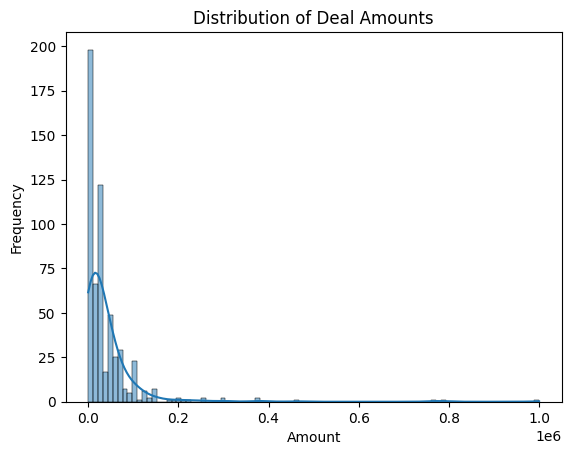

In [9]:
#2. Check and Visualize Amount Field
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing % and basic stats
print("Missing in 'Amount':", deals_cleaned['Amount'].isnull().mean())
print(deals_cleaned['Amount'].describe())

# Distribution plot
sns.histplot(deals_cleaned['Amount'].dropna(), kde=True)
plt.title("Distribution of Deal Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


count     593.000000
mean      153.819562
std       134.044086
min         0.000000
25%        89.000000
50%       128.000000
75%       167.000000
max      1045.000000
Name: Days to close, dtype: float64


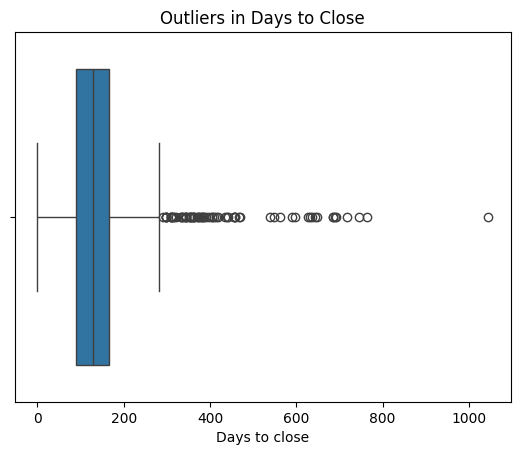

In [10]:
# 3. Check for Outliers in Days to Close
# Basic stats
print(deals_cleaned['Days to close'].describe())

# Boxplot to check for outliers
sns.boxplot(x=deals_cleaned['Days to close'])
plt.title("Outliers in Days to Close")
plt.show()


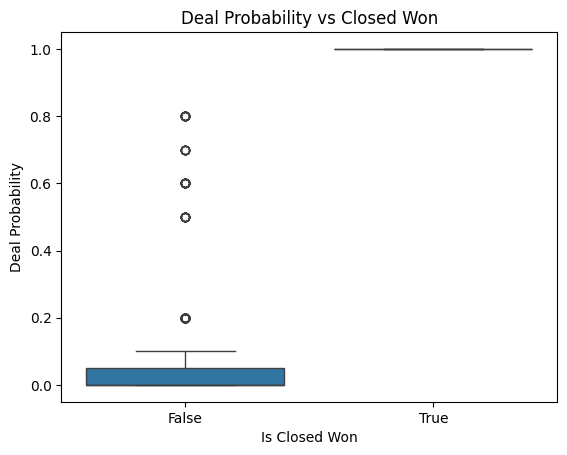

In [11]:
# 4. Explore Deal Probability vs. Outcome
# Boxplot of probability by deal outcome
sns.boxplot(x=deals_cleaned['Is Closed Won'], y=deals_cleaned['Deal probability'])
plt.title("Deal Probability vs Closed Won")
plt.xlabel("Is Closed Won")
plt.ylabel("Deal Probability")
plt.show()


In [12]:
# EDA for tickets

In [13]:
# 1. Drop columns with >95% missing
high_missing = tickets.columns[tickets.isnull().mean() > 0.95]
tickets_cleaned = tickets.drop(columns=high_missing)
print("Dropped columns:", list(high_missing))

# 2. Check time-related fields
time_fields = ['Time to close (HH:mm:ss)', 'Response time (HH:mm:ss)', 'Time to first agent email reply (HH:mm:ss)']
print(tickets_cleaned[time_fields].head())

# 3. Associated Deal analysis
print("Tickets with associated deal:", tickets_cleaned['Associated Deal'].notnull().sum())
print("Tickets without associated deal:", tickets_cleaned['Associated Deal'].isnull().sum())

# 4. Training completion overview
training_cols = [col for col in tickets.columns if "Training" in col]
training_missing = tickets[training_cols].isnull().mean() * 100
print(training_missing.sort_values(ascending=False))


Dropped columns: ['Ticket Tags', 'Category', 'Stage Date - Planning Phase', 'Last CES survey rating', 'Priority', 'Who will be creating the Syms?', 'Stage Date - Monitoring and Control Phase', 'Type', 'Trial Required', 'Was the sym QAed?']
  Time to close (HH:mm:ss) Response time (HH:mm:ss)  \
0               1004:48:10                      NaN   
1               2471:47:33                 49:24:00   
2                      NaN               1516:30:41   
3               2853:51:33                 26:25:51   
4                      NaN                 13:32:11   

  Time to first agent email reply (HH:mm:ss)  
0                                        NaN  
1                                   49:24:00  
2                                 1516:30:41  
3                                   26:25:51  
4                                   13:32:11  
Tickets with associated deal: 58
Tickets without associated deal: 21
Training: Sym Building 201                       75.949367
Training: Reporting

In [14]:
# EDA for companies

In [15]:
# 1. Drop High-Missing Columns
high_missing_cols = companies.columns[companies.isnull().mean() > 0.95]
companies_cleaned = companies.drop(columns=high_missing_cols)
print("Dropped columns:", list(high_missing_cols))

Dropped columns: ['Parent Company', 'Target Account', 'Total Agents', 'Close Date', '# of Agents Total', 'Revenue range', '# of Agents Contracted', 'Primary Company', 'Industry group', 'LMS System', 'SymTrain Use Cases', 'Associated Company', 'BPO', 'SSO Application', 'SymTrain Product', 'Contract End Date', 'SSO Implemented?', 'BPO Program', 'WFM', 'BPO Program Tier']


Industry
Computer Software                   1216
Hospital & Health Care              1197
Insurance                           1024
Banking                              901
NaN                                  774
Financial Services                   712
Professional Training & Coaching     669
Higher Education                     645
Technology                           594
Construction                         505
Name: count, dtype: int64


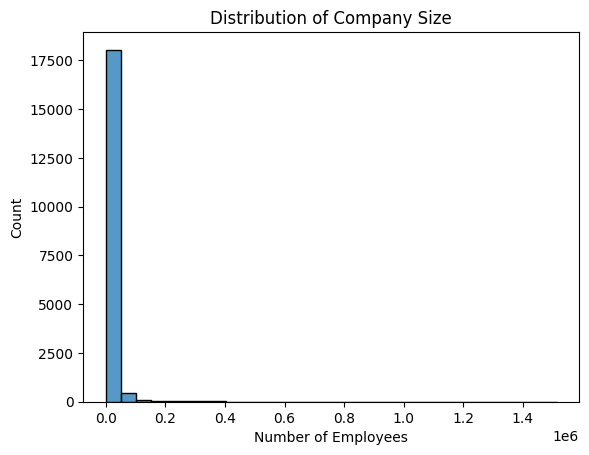

In [16]:
# 2. Explore Industry and Size
# Industry distribution
print(companies['Industry'].value_counts(dropna=False).head(10))

# Number of employees distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(companies['Number of Employees'].dropna(), bins=30)
plt.title("Distribution of Company Size")
plt.xlabel("Number of Employees")
plt.show()


In [17]:
# 3. Standardize Country/Region
# Check unique values and casing
print(companies['Country/Region'].str.strip().str.lower().value_counts().head(10))

Country/Region
united states     14670
canada              927
united kingdom      470
india               382
australia           226
germany             208
france              190
japan               162
switzerland         127
singapore            87
Name: count, dtype: int64


In [18]:
# 4. Parse Web Technologies (example split by comma)
# View how web technologies look
print(companies['Web Technologies'].dropna().head())

# Convert to lists
companies['Web_Tech_List'] = companies['Web Technologies'].dropna().apply(lambda x: [tech.strip() for tech in str(x).split(',')])

0                                             Route 53
2    Youtube; App Nexus; Google Tag Manager; Facebo...
3    Postmark; Facebook Advertiser; Salesforce; Goo...
4    Microsoft Office 365; Google Tag Manager; Reca...
6    Youtube; Apache; Google Maps; Wordpress; Tawk;...
Name: Web Technologies, dtype: object


In [19]:
# 5. Explore BPO Flag Inconsistencies
print(companies['BPO'].value_counts(dropna=False))
print(companies['BPO Program'].value_counts(dropna=False))


BPO
NaN                                                                         19770
Etech                                                                          38
Startek                                                                        11
Redial                                                                          7
Arise                                                                           3
Alorica                                                                         3
Everise                                                                         3
Lean                                                                            2
DialAmerica                                                                     2
TTEC                                                                            2
ERC                                                                             2
Other                                                                           2
Startek; Ete

In [20]:
# Ensure deal identifier fields are strings
tickets_cleaned['Associated Deal'] = tickets_cleaned['Associated Deal'].astype(str)
deals_cleaned['Deal Name'] = deals_cleaned['Deal Name'].astype(str)

# Find tickets whose 'Associated Deal' matches a 'Deal Name'
overlapping_deals = tickets_cleaned[tickets_cleaned['Associated Deal'].isin(deals_cleaned['Deal Name'])]

# Summary stats
overlap_count = overlapping_deals['Associated Deal'].nunique()
total_tickets_with_deals = tickets_cleaned['Associated Deal'].notnull().sum()

print("Total tickets with non-null 'Associated Deal':", total_tickets_with_deals)
print("Matching deals found in deals_cleaned dataset:", overlap_count)


Total tickets with non-null 'Associated Deal': 79
Matching deals found in deals_cleaned dataset: 38


In [21]:
# Merge tickets and deals

In [22]:
import json

# Step 1: Load mapping file (CompanyToTickets)
with open('mappings.json', 'r') as f:
    mappings = json.load(f)

# Load mappings.json
with open("mappings.json", "r") as f:
    mappings = json.load(f)

# Extract TicketToDeal mapping
ticket_to_deal = mappings["TicketToDeal"]

# Map ticket IDs to Deal Names
tickets_cleaned["Ticket ID"] = tickets_cleaned["Ticket ID"].astype(str)
deals_cleaned["Deal Name"] = deals_cleaned["Deal Name"].astype(str)
tickets_cleaned["Mapped Deal Name"] = tickets_cleaned["Ticket ID"].map(ticket_to_deal)

# Merge using Deal Name (not Record ID!)
merged_tickets_deals = pd.merge(
    tickets_cleaned,
    deals_cleaned,
    left_on="Mapped Deal Name",
    right_on="Deal Name",
    how="inner",
    suffixes=("_ticket", "_deal")
)

# Optional: Summary of the merge
merge_report = {
    "Tickets with mapped deal": tickets_cleaned["Mapped Deal Name"].notnull().sum(),
    "Merged Rows": merged_tickets_deals.shape[0],
    "Unique Ticket IDs in Merge": merged_tickets_deals["Ticket ID"].nunique(),
    "Unique Deal Names in Merge": merged_tickets_deals["Deal Name"].nunique()
}

print("✅ Merge Summary:")
for k, v in merge_report.items():
    print(f"{k}: {v}")

✅ Merge Summary:
Tickets with mapped deal: 58
Merged Rows: 57
Unique Ticket IDs in Merge: 56
Unique Deal Names in Merge: 38


In [23]:
#export to csv file
merged_tickets_deals.to_csv("eda_merge_with_clusters.csv", index=False)


In [24]:
# Check the merge quality
# Check total number of tickets that had a mapping
total_mapped_tickets = tickets_cleaned["Mapped Deal Name"].notnull().sum()

# Check how many tickets successfully merged
total_merged_rows = merged_tickets_deals.shape[0]
unique_ticket_ids = merged_tickets_deals["Ticket ID"].nunique()
unique_deal_names = merged_tickets_deals["Deal Name"].nunique()

# Check for duplicates (1 ticket → multiple deal rows)
duplicate_ticket_ids = merged_tickets_deals["Ticket ID"].duplicated().sum()

# Check for deals associated with multiple tickets
deal_to_ticket_counts = merged_tickets_deals["Mapped Deal Name"].value_counts()
deals_with_multiple_tickets = (deal_to_ticket_counts > 1).sum()

# Optional: Check how many merged deals are Closed Won
if "Is Closed Won" in merged_tickets_deals.columns:
    closed_won_count = merged_tickets_deals["Is Closed Won"].sum()
else:
    closed_won_count = "Not Available"

# Compile report
merge_quality_report = {
    "Tickets with mapped deals": total_mapped_tickets,
    "Merged rows": total_merged_rows,
    "Unique ticket IDs in merged data": unique_ticket_ids,
    "Unique deal names in merged data": unique_deal_names,
    "Duplicate ticket IDs in merged data": duplicate_ticket_ids,
    "Deals linked to multiple tickets": deals_with_multiple_tickets,
    "Closed Won deals (if available)": closed_won_count
}

# Display report
print("📊 Merge Quality Report")
for key, value in merge_quality_report.items():
    print(f"{key}: {value}")


📊 Merge Quality Report
Tickets with mapped deals: 58
Merged rows: 57
Unique ticket IDs in merged data: 56
Unique deal names in merged data: 38
Duplicate ticket IDs in merged data: 1
Deals linked to multiple tickets: 10
Closed Won deals (if available): 31


# Problems to solve in the Final Report and Posisble Solutions:



In [25]:
import pandas as pd

# Define the left column (objectives) and right column (model suggestions)
objectives = [
    "Segment prospective customers based on company characteristics and provide tailored outreach strategies",
    "Guide sales progression through pipeline stages with specific actions for each stage",
    "Predict deal outcomes based on company profile and deal characteristics",
    "Optimize implementation handoffs between sales and customer success",
    "Recommend resource allocation based on customer segment and complexity",
    "Present insights through an interactive dashboard for sales team usage",
    "Process data through an ETL pipeline to keep recommendations current",
    "Deploy as a containerized application for consistent environment setup"
]

model_suggestions = [
    "Clustering (KMeans, DBSCAN), EDA",
    'Look into the ticket data and the deals data, is all steps always needed for a successful deal? Is training always needed for upsell and new customers? ',
    "Classification models (Logistic Regression, Random Forest, XGBoost, Neural Network for Binary classification)",
    " ",
    "complexity can be measured by total tickets needed for each deal, average resolution time needed, etc, does different segments of customers have the"
     "same implementation complexity?  Does different segments of customers requires same actions?",
    "Streamlit",
    "ETL frameworks (Pandas pipelines), data cleaning scripts",
    "Docker, Docker Compose, Kubernetes for containerization and deployment"
]

# Create the dataframe
df = pd.DataFrame({
    "Project Objective": objectives,
    "Suggested Models / Tools": model_suggestions
})



In [26]:
df

,Project Objective,Suggested Models / Tools
0,Segment prospective customers based on company...,"Clustering (KMeans, DBSCAN), EDA"
1,Guide sales progression through pipeline stage...,"Look into the ticket data and the deals data, ..."
2,Predict deal outcomes based on company profile...,"Classification models (Logistic Regression, Ra..."
3,Optimize implementation handoffs between sales...,
4,Recommend resource allocation based on custome...,complexity can be measured by total tickets ne...
5,Present insights through an interactive dashbo...,Streamlit
6,Process data through an ETL pipeline to keep r...,"ETL frameworks (Pandas pipelines), data cleani..."
7,Deploy as a containerized application for cons...,"Docker, Docker Compose, Kubernetes for contain..."


# Sales Insights Modeling Pipeline

This notebook demonstrates an end‐to‐end modeling pipeline for analyzing sales data. It is divided into several sections:

1. **Imports & Helper Functions:** Load required libraries and define helper functions.
2. **ETL Pipeline:** Load and preprocess the merged data.
3. **Clustering Models:** Segment customers using KMeans and DBSCAN.
4. **Classification Models:** Predict deal outcomes using Logistic Regression, Random Forest, and XGBoost.
5. **Interactive Dashboard:** Visualize insights using Streamlit.

Each section is explained below.


In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st  # For interactive dashboard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Helper function to convert HH:mm:ss to seconds
def hhmmss_to_seconds(time_str):
    """Convert a time string in HH:mm:ss format to total seconds."""
    try:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except Exception:
        return np.nan


## ETL Pipeline
This section loads the CSV file containing the merged data (named `eda_merge_with_clusters.csv`) into a DataFrame (`merged_tickets_deals`). It also performs simple preprocessing:
- Fills missing values.
- Converts time strings (e.g., "Time to close (HH:mm:ss)") to seconds.


In [28]:
def etl_pipeline(file_path):
    """
    Load and process the merged data.
    
    - Reads CSV data into a DataFrame named merged_tickets_deals.
    - Fills missing values.
    - Converts "Time to close (HH:mm:ss)" into seconds.
    """

    merged_tickets_deals.fillna(method='ffill', inplace=True)
    
    # Convert "Time to close (HH:mm:ss)" to seconds if available
    if "Time to close (HH:mm:ss)" in merged_tickets_deals.columns:
        merged_tickets_deals["time_to_close_seconds"] = merged_tickets_deals["Time to close (HH:mm:ss)"].apply(hhmmss_to_seconds)
    else:
        merged_tickets_deals["time_to_close_seconds"] = np.nan

    print("Columns in the dataset:")
    print(merged_tickets_deals.columns.tolist())
    
    return merged_tickets_deals

merged_tickets_deals = etl_pipeline("eda_merge_with_clusters.csv")


Columns in the dataset:
['Create date', 'Stage Date - Project Launch', 'Associated Contact', 'Target Launch Date', 'Kickoff Call', 'Close date', 'Pipeline_ticket', 'Stage Date - Project Initiation', 'Ticket status', 'Stage Date - Execution', 'Time to first agent email reply (HH:mm:ss)', 'Associated Company_ticket', 'Stage Date - Closure Phase', 'Associated Company (Primary)_ticket', 'Response time (HH:mm:ss)', 'Ticket ID', 'Time to close (HH:mm:ss)', 'Associated Deal', 'Library index approved', 'Training: General Overview', 'Latest Milestone', 'Training: Deployment/User Management Training', 'Requirements for the Trial', 'Training: Sym Building 101', 'Last modified date', 'Trial End Date_ticket', 'Training: Sym Building 201', 'Stage Date - Converted Won', 'Latest Milestone Update Date', 'Ticket name', 'Trial Overview', 'Trial Start Date', '1st Syms presented for review', 'Project Launch Day', 'Training: Reporting', 'Construction of 1st Sym begun', 'Mapped Deal Name', 'Weighted amount',

/var/folders/2d/d0kzt8513jx2wgn4ml9fmy0w0000gn/T/ipykernel_42580/2028780136.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_tickets_deals.fillna(method='ffill', inplace=True)
/var/folders/2d/d0kzt8513jx2wgn4ml9fmy0w0000gn/T/ipykernel_42580/2028780136.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_tickets_deals.fillna(method='ffill', inplace=True)


## Clustering Models
In this section, we segment the data using two unsupervised clustering techniques:
- **KMeans:** Groups companies based on numeric features such as weighted amount, deal probability, deal score, days to close, and time-to-close (in seconds).
- **DBSCAN:** Provides an alternative clustering method that can identify clusters of arbitrary shape and filter noise.

Adjust the feature list as needed based on your data.


In [29]:
# def clustering_model(merged_tickets_deals):
#     """
#     Apply clustering to segment companies.
    
#     Features used:
#       - 'Weighted amount in company currency'
#       - 'Deal probability'
#       - 'Deal Score'
#       - 'Days to close'
#       - 'time_to_close_seconds'
#     """
#     features = ['Weighted amount in company currency', 'Deal probability', 'Deal Score', 'Days to close', 'time_to_close_seconds']
#     # Drop rows with missing values in the selected features
#     X = merged_tickets_deals[features].dropna()
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
    
#     # --- KMeans Clustering ---
#     kmeans = KMeans(n_clusters=3, random_state=42)
#     clusters = kmeans.fit_predict(X_scaled)
#     # Assign clusters to the original DataFrame for rows with valid data
#     merged_tickets_deals.loc[X.index, 'kmeans_cluster'] = clusters
    
#     # --- DBSCAN Clustering ---
#     dbscan = DBSCAN(eps=0.5, min_samples=5)
#     db_clusters = dbscan.fit_predict(X_scaled)
#     merged_tickets_deals.loc[X.index, 'dbscan_cluster'] = db_clusters
    
#     return merged_tickets_deals, kmeans, dbscan


# merged_tickets_deals, kmeans_model, dbscan_model = clustering_model(merged_tickets_deals)

# # Cluster counts
# print("KMeans cluster counts:")
# print(merged_tickets_deals['kmeans_cluster'].value_counts())

# print("\nDBSCAN cluster counts:")
# print(merged_tickets_deals['dbscan_cluster'].value_counts())

# # KMeans inertia
# print("\nKMeans Inertia:", kmeans_model.inertia_)



In [30]:
def clustering_model(merged_tickets_deals):
    """
    Apply clustering to segment companies.
    
    Features used:
      - 'Deal probability'
      - 'Deal Score'
      - 'Days to close'
    """
    features = ['Deal probability', 'Deal Score', 'Days to close']
    # Drop rows with missing values in the selected features
    X = merged_tickets_deals[features].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # --- KMeans Clustering ---
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    # Assign clusters to the original DataFrame for rows with valid data
    merged_tickets_deals.loc[X.index, 'kmeans_cluster'] = clusters
    
    # --- DBSCAN Clustering ---
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    db_clusters = dbscan.fit_predict(X_scaled)
    merged_tickets_deals.loc[X.index, 'dbscan_cluster'] = db_clusters
    
    return merged_tickets_deals, kmeans, dbscan


merged_tickets_deals, kmeans_model, dbscan_model = clustering_model(merged_tickets_deals)

# Cluster counts
print("KMeans cluster counts:")
print(merged_tickets_deals['kmeans_cluster'].value_counts())

print("\nDBSCAN cluster counts:")
print(merged_tickets_deals['dbscan_cluster'].value_counts())

# KMeans inertia
print("\nKMeans Inertia:", kmeans_model.inertia_)

KMeans cluster counts:
kmeans_cluster
1.0    37
0.0    10
2.0     9
Name: count, dtype: int64

DBSCAN cluster counts:
dbscan_cluster
-1.0    32
 0.0    19
 1.0     5
Name: count, dtype: int64

KMeans Inertia: 75.66134240544112


The kmeans cluster shows: Balanced distribution, with all clusters having a meaningful number of points.

DBSCAN identified some structure, with ~56% as noise (acceptable), and two small but valid clusters.

Lower inertia = tighter clusters = potentially better KMeans performance (though inertia alone doesn't prove cluster quality).

In [31]:
print(merged_tickets_deals.columns.tolist())


['Create date', 'Stage Date - Project Launch', 'Associated Contact', 'Target Launch Date', 'Kickoff Call', 'Close date', 'Pipeline_ticket', 'Stage Date - Project Initiation', 'Ticket status', 'Stage Date - Execution', 'Time to first agent email reply (HH:mm:ss)', 'Associated Company_ticket', 'Stage Date - Closure Phase', 'Associated Company (Primary)_ticket', 'Response time (HH:mm:ss)', 'Ticket ID', 'Time to close (HH:mm:ss)', 'Associated Deal', 'Library index approved', 'Training: General Overview', 'Latest Milestone', 'Training: Deployment/User Management Training', 'Requirements for the Trial', 'Training: Sym Building 101', 'Last modified date', 'Trial End Date_ticket', 'Training: Sym Building 201', 'Stage Date - Converted Won', 'Latest Milestone Update Date', 'Ticket name', 'Trial Overview', 'Trial Start Date', '1st Syms presented for review', 'Project Launch Day', 'Training: Reporting', 'Construction of 1st Sym begun', 'Mapped Deal Name', 'Weighted amount', 'Deal Description', 'Cu

## Classification Models
Here we build classification models to predict deal outcomes. We assume that the binary target column `Is Closed Won` exists in the data.
The models used are:
- **Logistic Regression:** A linear model for binary classification.
- **Random Forest:** An ensemble method that builds multiple decision trees.
- **XGBoost:** A gradient boosting model optimized for performance.

The feature set is the same as used in clustering, and we drop rows with missing values.


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def classification_model_log_reg(merged_tickets_deals):
    # Define the feature list
    features = [
        'Deal Score',
        'Deal probability',
        'Days to close',
        'Amount',
        'Weighted amount',
        'Forecast amount'
    ]
    
    # Drop rows missing any of the features or target
    data = merged_tickets_deals[features + ['Is Closed (numeric)']].dropna()
    X = data[features]
    y = data['Is Closed (numeric)']
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features for models that require scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # --- Logistic Regression ---
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
    
    # Print evaluation results
    print("\n--- Logistic Regression ---")
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    return log_reg, (X_test_scaled, y_test), y_pred

# Call the logistic regression function to see output
results = classification_model_log_reg(merged_tickets_deals)



--- Logistic Regression ---
Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.90      1.00      0.95         9

    accuracy                           0.92        12
   macro avg       0.95      0.83      0.87        12
weighted avg       0.92      0.92      0.91        12

Confusion Matrix:
 [[2 1]
 [0 9]]


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 1) HELPER FUNCTION TO PRINT OUTPUT
def print_cv_classification_output(model_name, y_true, y_pred):
    """
    Prints a classification report and confusion matrix in a readable format,
    similar to the style of your Logistic Regression output.
    """
    accuracy = np.mean(y_pred == y_true)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}\n")
    
    # Print standard classification report with 2 decimal digits
    print(classification_report(y_true, y_pred, digits=2))
    
    # Print confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()

# 2) DEFINE YOUR DATA (EXAMPLE: from merged_tickets_deals)
#    Make sure merged_tickets_deals is already in your environment.
features = [
    'Weighted amount in company currency',
    'Deal probability',
    'Deal Score',
    'Days to close',
    'time_to_close_seconds'
]

# Optionally include 'cluster' if it exists
if 'cluster' in merged_tickets_deals.columns:
    features.append('cluster')

X = merged_tickets_deals[features]
y = merged_tickets_deals['Is Open (numeric)']

# Filter out rows where the target is missing
valid_rows = y.notna()
X = X[valid_rows]
y = y[valid_rows].astype(int)

# 3) DEFINE A PIPELINE FOR RANDOM FOREST
pipeline_rf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])

# 4) CREATE OUT-OF-FOLD PREDICTIONS USING 5-FOLD CV
#    cross_val_predict returns predictions for each data point, resulting from each fold.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_rf = cross_val_predict(pipeline_rf, X, y, cv=cv)

# 5) PRINT CLASSIFICATION REPORT & CONFUSION MATRIX
print_cv_classification_output("Random Forest (5-fold CV)", y, y_pred_rf)


--- Random Forest (5-fold CV) ---
Accuracy: 0.95

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.79      0.88        14

    accuracy                           0.95        57
   macro avg       0.97      0.89      0.92        57
weighted avg       0.95      0.95      0.95        57

Confusion Matrix:
[[43  0]
 [ 3 11]]



In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

# Helper function to print the classification report and confusion matrix
def print_cv_classification_output(model_name, y_true, y_pred):
    accuracy = np.mean(y_pred == y_true)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}\n")
    print(classification_report(y_true, y_pred, digits=2))
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()

# Define feature list
features = [
    'Weighted amount in company currency',
    'Deal probability',
    'Deal Score',
    'Days to close',
    'time_to_close_seconds'
]

# Optionally include 'cluster' if it exists in the merged_tickets_deals DataFrame
if 'cluster' in merged_tickets_deals.columns:
    features.append('cluster')

# Extract features and target from merged_tickets_deals, and remove rows where the target is missing.
X = merged_tickets_deals[features]
y = merged_tickets_deals['Is Open (numeric)']

# Keep only rows where y is not missing, and cast y to integer.
valid_rows = y.notna()
X = X[valid_rows]
y = y[valid_rows].astype(int)

# Define the XGBoost pipeline
pipeline_xgb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(
        n_estimators=20,       # Fewer trees for faster training
        max_depth=3,           # Shallower trees to reduce overfitting
        learning_rate=0.1,
        eval_metric='logloss',
        objective='binary:logistic',  # Binary classification objective
        random_state=42,
        verbosity=0            # Suppress messages
    ))
])

# Set up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Generate out-of-fold predictions using cross_val_predict
y_pred_xgb = cross_val_predict(pipeline_xgb, X, y, cv=cv)

# Print the combined cross-validated classification report and confusion matrix for XGBoost
print_cv_classification_output("XGBoost (5-fold CV)", y, y_pred_xgb)


--- XGBoost (5-fold CV) ---
Accuracy: 0.98

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.93      0.96        14

    accuracy                           0.98        57
   macro avg       0.99      0.96      0.98        57
weighted avg       0.98      0.98      0.98        57

Confusion Matrix:
[[43  0]
 [ 1 13]]



## Interactive Dashboard with Streamlit
This section creates an interactive dashboard that:
- Displays cluster summaries and distributions.
- Plots a scatter plot for visualizing the relationship between weighted deal amount and time to close.
- Provides resource allocation recommendations based on average time to close per cluster.

Run this cell using Streamlit to launch your dashboard.


In [37]:
%%writefile mid.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def classification_model_log_reg(df):
    """
    Performs Logistic Regression on the given DataFrame.
    Expects the DataFrame to have the following columns:
        - 'Deal Score'
        - 'Deal probability'
        - 'Days to close'
        - 'Amount'
        - 'Weighted amount'
        - 'Forecast amount'
        - 'Is Closed (numeric)'
    Rows with missing values for any of these columns will be dropped.
    Returns the trained model, test data & predictions, accuracy, classification report, and confusion matrix.
    """
    # Define the features and target
    features = [
        'Deal Score',
        'Deal probability',
        'Days to close',
        'Amount',
        'Weighted amount',
        'Forecast amount'
    ]
    
    required_cols = features + ['Is Closed (numeric)']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        st.error("The following required columns are missing: " + ", ".join(missing_cols))
        return None
    
    # Drop rows with missing values in required columns
    data = df[required_cols].dropna()
    X = data[features]
    y = data['Is Closed (numeric)']
    
    # Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Logistic Regression model
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
    
    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return log_reg, (X_test_scaled, y_test), y_pred, acc, clf_report, cm

def plot_confusion_matrix(cm):
    """Creates and returns a matplotlib figure for the confusion matrix."""
    fig, ax = plt.subplots()
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("True", fontsize=12)
    ax.set_title("Confusion Matrix", fontsize=14)
    
    # Annotate each cell with its count
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, str(z), ha='center', va='center', color='red', fontsize=12)
    
    return fig

def main():
    st.title("Logistic Regression Classification Model")
    st.write("Upload a CSV file containing your data (with required columns) to perform Logistic Regression.")
    
    uploaded_file = st.file_uploader("Choose a CSV file", type=["csv"])
    
    if uploaded_file is not None:
        # Read CSV file into DataFrame
        df = pd.read_csv("eda_merge_with_clusters.csv")
        st.write("### Data Preview")
        st.dataframe(df.head())
        
        # Run the logistic regression model on the uploaded data
        result = classification_model_log_reg(df)
        if result is not None:
            log_reg, test_data, y_pred, acc, clf_report, cm = result
            st.write("### Classification Report")
            st.text(clf_report)
            st.write("**Accuracy:** {:.2f}".format(acc))
            st.write("### Confusion Matrix")
            fig = plot_confusion_matrix(cm)
            st.pyplot(fig)
    else:
        st.info("Please upload a CSV file to begin.")

if __name__ == "__main__":
    main()


Overwriting mid.py


### Possible Q&A



### Q1: What does it mean by ‘customer segment and complexity’ in the requirement *“Recommend resource allocation based on customer segment and complexity”*? Also, what are the actions to take at each stage — aren’t those actions fixed?

**A1:**  
Customer segment and implementation complexity can be evaluated primarily through the **ticket data**. Some useful indicators include:

- Number of support tickets generated per implementation (more tickets may indicate higher complexity)
- Average resolution time for implementation-related issues
- Whether SSO (Single Sign-On) was required and whether it accelerated or delayed implementation

You can quantify **implementation complexity** by engineering a feature that aggregates these signals.


### Q2: What are the actions to take at each stage — aren’t those actions fixed?

**A:**  
Yes, the standard actions for each stage are typically fixed. However, the ticket and deal data may reveal valuable insights that can help **adapt or skip certain stages** under specific conditions. For example:

- If the deal is an **upsell** to an existing customer, the **training stage** may not be necessary, as the customer is already familiar with the product.
- What does historical data show? Have some successful deals **skipped onboarding or negotiation** and still closed faster or more successfully?






# Final Report Format

1. Title Page (project title, course name, group member name and VUID)
2. Introduction
3. Data Overview & Exploration
4. Data Processing
5. Model Deployment
6. Dashboard & Visualization
7. Deployment & Technical Implementation
8. Business Insights & Recommendations
9. Conclusion & Future Work
10. References (if applicable) 
